# Code to create figure 9 and 10
also used for figures B.1.5-6, B.2.5-6, B.3.5-6, B.4.5-6, and B.5.5-6
### Visualizing EOF analysis

Used in the manuscript,  
Evaporative Moisture Sources of Colorado’s Front Range: A Case Study of the Exceptionally Wet May-July Season of 2023

## Inputs and functions

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from datetime import datetime
import cartopy as ct
import cartopy.crs as ccrs
import cmocean as cmocean
import os
import pandas as pd
import warnings
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
from matplotlib.transforms import ScaledTranslation
warnings.filterwarnings("ignore")

def get_colorbar_extend(data, vmin, vmax):
    """
    Determines the appropriate 'extend' setting for a matplotlib colorbar
    based on data range and color limits.

    Parameters:
    - data: A NumPy array or xarray.DataArray.
    - vmin: Lower limit of the color scale.
    - vmax: Upper limit of the color scale.

    Returns:
    - A string: 'neither', 'min', 'max', or 'both'.
    """
    data_min = data.min().item()
    data_max = data.max().item()

    if data_min < vmin and data_max > vmax:
        return 'both'
    elif data_min < vmin:
        return 'min'
    elif data_max > vmax:
        return 'max'
    else:
        return 'neither'

## Open data from EOF analysis 
Conducting the EOF analysis took much larger resources than could be run on a laptop, so the python script to coduct the analysis is separated and can be found in the file EOF_analysis.py

In [4]:
#User can change--------------------------------------
sink_region = 'nfr' #nfr, ne, se, sp, pp
eof_num = 2 #how many EOFs to retain, maximum = # of gridcells in domain
view_box = [-125,-80,15,55] #min lon, max lon, min lat, max lat
vmax = 500_000 #max e-track anomaly on colorbar (m^3)
save_plots = True
SAVE_DIRECTORY = f'/Users/kathum/Research/COPEX/figures/2000-2023_{sink_region}/'+ datetime.today().strftime('%m_%d_%Y') +'/from_cashew/'
date = '04_17' #date the scripts were produced MM_DD (only for finding scripts later in code)
DATA_DIRECTORY = f'/Users/kathum/Research/COPEX/eof_analysis_data/from_cashew/{sink_region}/'
SINK_R_DIRECTORY = '/Users/kathum/Research/COPEX/sink_region_files/masks/' #Where the sink region netCDFs are located
#-----------------------------------------------------
if save_plots == True:
    if not os.path.exists(SAVE_DIRECTORY):
        os.makedirs(SAVE_DIRECTORY)
        print('created new directory at: ', SAVE_DIRECTORY)

eof_number = np.arange(0,eof_num)

#read in ouput from EOF analysis
variable_dtype = {'lam':np.float32, 'E':np.float32,'i':np.int64,'Z':np.float32, 'pve':np.float32, 'X':np.float32, 'lat':np.float32, 'lon':np.float32}

lam = np.loadtxt(f'{DATA_DIRECTORY}lam_{date}.csv', delimiter=',', dtype=variable_dtype['lam'])
i = np.loadtxt(f'{DATA_DIRECTORY}i_{date}.csv', delimiter=',', dtype=variable_dtype['i'])
Z = np.loadtxt(f'{DATA_DIRECTORY}Z_{date}.csv', delimiter=',', dtype=variable_dtype['Z'])
pve = np.loadtxt(f'{DATA_DIRECTORY}pve_{date}.csv', delimiter=',', dtype=variable_dtype['pve']) #note pve is sorted from least to greatest
X = np.loadtxt(f'{DATA_DIRECTORY}X_{date}.csv', delimiter=',', dtype=variable_dtype['X'])
lat_vals = np.loadtxt(f'{DATA_DIRECTORY}latitude_{date}.csv', delimiter = ',', dtype=variable_dtype['lat'])
lon_vals = np.loadtxt(f'{DATA_DIRECTORY}longitude_{date}.csv', delimiter = ',', dtype=variable_dtype['lon'])
e1 = np.loadtxt(f'{DATA_DIRECTORY}e1_{date}.csv', delimiter = ',', dtype=variable_dtype['E'])
e2 = np.loadtxt(f'{DATA_DIRECTORY}e2_{date}.csv', delimiter = ',', dtype=variable_dtype['E'])
d1 = np.loadtxt(f'{DATA_DIRECTORY}d1_{date}.csv', delimiter = ',', dtype=variable_dtype['E'])
d2 = np.loadtxt(f'{DATA_DIRECTORY}d2_{date}.csv', delimiter = ',', dtype=variable_dtype['E'])

#alter sign of 1st EOF if shown in the negative phase (for writing consistency)
if Z[-1,0] <0:
    e1 = -e1
    d1 = -d1
    Z1 = -Z[:, 0] 
else:
    Z1 = Z[:, 0]

## Plotting

saved eof 1 figure


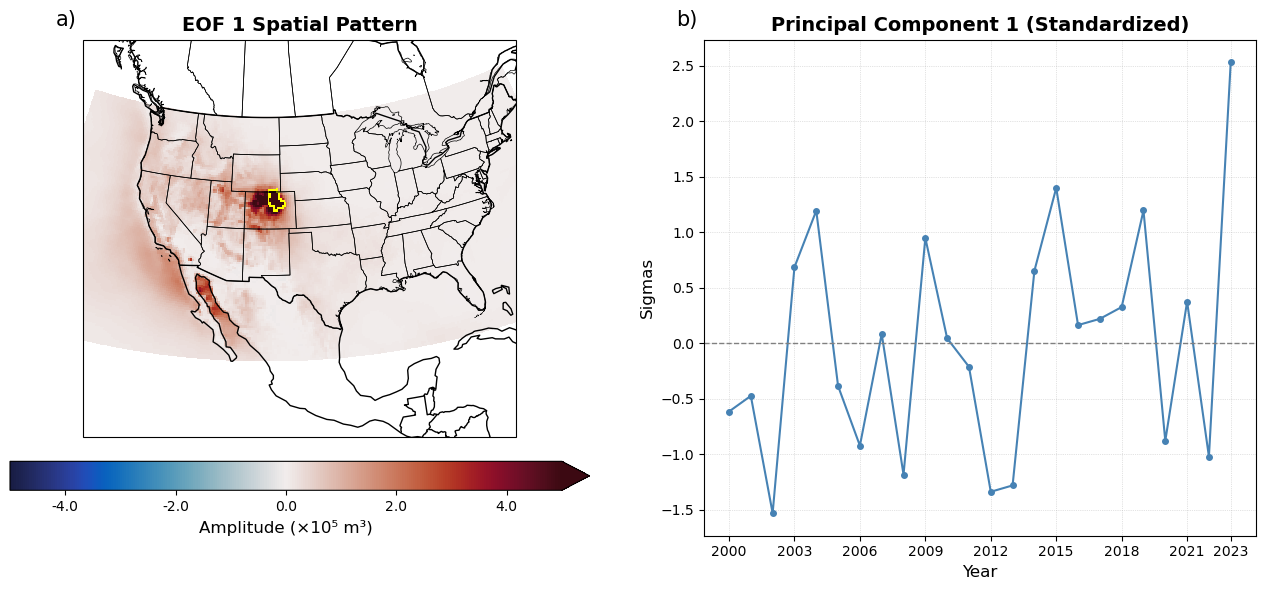

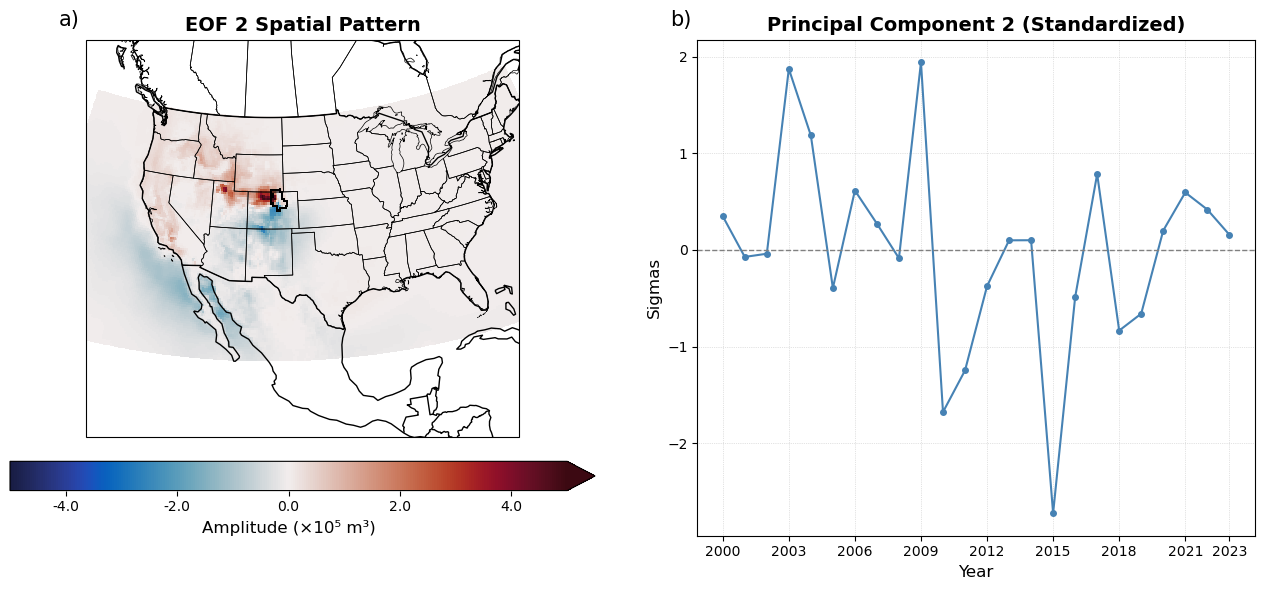

saved eof 2 figure


In [8]:
#plot 1st EOF-----------------------------------
# left subplot: d1 map 
# create figure with a gridspec layout
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1])

mapProj = ct.crs.LambertConformal(central_longitude=-106) #projection to use for map
ax1 = fig.add_subplot(gs[0, 0], projection=mapProj)
d1_plot = xr.DataArray(d1.reshape(len(lat_vals), len(lon_vals)), coords=[lat_vals, lon_vals])
plot = d1_plot.plot(
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.balance,
    add_colorbar=False,
    ax=ax1,
    vmax=vmax
)
# colorbar
extend_val = get_colorbar_extend(data = d1_plot, vmin = -vmax, vmax = vmax)
cbar = plt.colorbar(plot, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.7, extend=extend_val)
cbar.set_label('Amplitude (×10⁵ m³)', fontsize=12)
cbar.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-5:.1f}'))
# add sink region overlay
region_file_name = {'ne': 'Northeast', 'nfr': 'Northern_Front_Range', 'pp': 'Pikes_Peak', 'sp': 'South_Park', 'se': 'Southeast'}
region = xr.open_dataarray(SINK_R_DIRECTORY + 'co_AltClimate_' + region_file_name[sink_region] + '_source_region.nc')
region_roll = region.rolling(latitude=3, longitude=3, center=True).sum()
region.where((region_roll < 9.0) & (region_roll >= 1) & (region == 0)).plot(
    cmap=ListedColormap(['yellow']),add_colorbar=False,ax=ax1,transform=ccrs.PlateCarree())
region.close()
# cartopy map features
ax1.coastlines(resolution='110m', linewidth=1)
ax1.add_feature(ct.feature.STATES, linewidth=0.5)
ax1.add_feature(ct.feature.BORDERS, linewidth=1)
ax1.set_extent(view_box, crs=ccrs.PlateCarree())
ax1.set_title('EOF 1 Spatial Pattern', fontsize=14, weight='bold')
ax1.text(0.0, 1.0, 'a)', transform=(ax1.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
         fontsize=15, va='bottom')

# right subplot: PC1 time series 
ax2 = fig.add_subplot(gs[0, 1])

# Create year labels
years = pd.date_range(start='2000', end='2023', freq='YS')
x_labels = years.strftime('%Y').tolist()
step = 3
tick_indices = list(range(0, len(x_labels), step))
if '2023' in x_labels:
    idx_2023 = x_labels.index('2023')
    if idx_2023 not in tick_indices:
        tick_indices.append(idx_2023)
        tick_indices.sort()

ax2.plot(Z1, color='steelblue', linewidth=1.5, label='PC1', marker='o', markersize=4)
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_xticks(tick_indices)
ax2.set_xticklabels([x_labels[i] for i in tick_indices], rotation=0, fontsize=10)
ax2.set_title('Principal Component 1 (Standardized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Sigmas', fontsize=12)
ax2.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax2.text(0.0, 1.0, 'b)', transform=(ax2.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
         fontsize=15, va='bottom')
plt.tight_layout()
plt.savefig(SAVE_DIRECTORY + 'd1_pc1_combined.png', dpi=500)
print('saved eof 1 figure')
plt.show()

#Plot 2nd EOF figures---------------------------------------
#left subplot d2 map
# Create a figure with a GridSpec layout
fig = plt.figure(figsize=(14, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[1.5, 1])
mapProj = ct.crs.LambertConformal(central_longitude=-106)
ax1 = fig.add_subplot(gs[0, 0], projection=mapProj)
d1_plot = xr.DataArray(d2.reshape(len(lat_vals), len(lon_vals)), coords=[lat_vals, lon_vals])
plot = d1_plot.plot(
    transform=ccrs.PlateCarree(),
    cmap=cmocean.cm.balance,
    add_colorbar=False,
    ax=ax1,
    vmax=vmax
)
# Colorbar
extend_val = get_colorbar_extend(data = d1_plot, vmin = -vmax, vmax = vmax)
cbar = plt.colorbar(plot, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.7, extend=extend_val)
cbar.set_label('Amplitude (×10⁵ m³)', fontsize=12)
cbar.ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x*1e-5:.1f}'))
# Add region overlay
region_file_name = {'ne': 'Northeast', 'nfr': 'Northern_Front_Range', 'pp': 'Pikes_Peak', 'sp': 'South_Park', 'se': 'Southeast'}
region = xr.open_dataarray(SINK_R_DIRECTORY + 'co_AltClimate_' + region_file_name[sink_region] + '_source_region.nc')
region_roll = region.rolling(latitude=3, longitude=3, center=True).sum()
region.where((region_roll < 9.0) & (region_roll >= 1) & (region == 0)).plot(
    cmap=ListedColormap(['black']),add_colorbar=False,ax=ax1,transform=ccrs.PlateCarree())
region.close()
# Cartopy features
ax1.coastlines(resolution='110m', linewidth=1)
ax1.add_feature(ct.feature.STATES, linewidth=0.5)
ax1.add_feature(ct.feature.BORDERS, linewidth=1)
ax1.set_extent(view_box, crs=ccrs.PlateCarree())
ax1.set_title('EOF 2 Spatial Pattern', fontsize=14, weight='bold')
ax1.text(0.0, 1.0, 'a)', transform=(ax1.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
         fontsize=15, va='bottom')

#right subplot: PC2 time series
Z2 = Z[:, 1]
ax2 = fig.add_subplot(gs[0, 1])

# Create year labels
years = pd.date_range(start='2000', end='2023', freq='YS')
x_labels = years.strftime('%Y').tolist()
step = 3
tick_indices = list(range(0, len(x_labels), step))
if '2023' in x_labels:
    idx_2023 = x_labels.index('2023')
    if idx_2023 not in tick_indices:
        tick_indices.append(idx_2023)
        tick_indices.sort()

ax2.plot(Z2, color='steelblue', linewidth=1.5, label='PC1', marker='o', markersize=4)
ax2.axhline(0, color='gray', linestyle='--', linewidth=1)
ax2.set_xticks(tick_indices)
ax2.set_xticklabels([x_labels[i] for i in tick_indices], rotation=0, fontsize=10)
ax2.set_title('Principal Component 2 (Standardized)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Sigmas', fontsize=12)
ax2.grid(True, linestyle=':', linewidth=0.5, alpha=0.7)
ax2.text(0.0, 1.0, 'b)', transform=(ax2.transAxes + ScaledTranslation(-20/72, +7/72, fig.dpi_scale_trans)),
         fontsize=15, va='bottom')
plt.tight_layout()
plt.savefig(SAVE_DIRECTORY + 'd2_pc2_combined.png', dpi=500)
plt.show()
print('saved eof 2 figure')

